In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

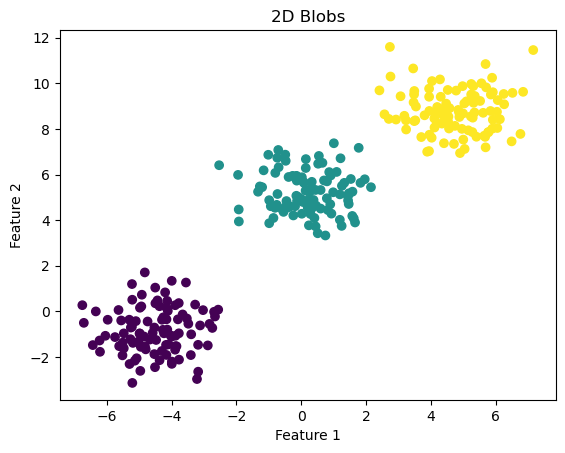

In [8]:
X, y = make_blobs(
    n_samples=300,
    n_features=2
)
# Plotting the first two features of the data and coloring the points based on the cluster they belong to
plt.scatter(X[:, 0], X[:, 1], c=y,)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Blobs')
plt.show()

In [9]:


# Step 3: Fit KMeans on scaled training data
model = KMeans(n_clusters=3, random_state=42, n_init=10)
model.fit(X)



c:\Users\jerar\anaconda3\envs\foodclassify\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [11]:
Y_test = [[-6, 0], [3, 4], [8,10]]
print("New Prediction array=",Y_test)
print("Cluster Labels=",model.predict(Y_test))

New Prediction array= [[-6, 0], [3, 4], [8, 10]]
Cluster Labels= [0 2 1]
